<div style="display: flex; background-color: RGB(204,0,102);" >
<h1 style="margin: auto; padding: 30px; ">La Préduction des délais de livraison </h1>
</div>

<div style="background-color: RGB(218,112,214);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Librairies et fichiers csv</h2>
</div>

<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns

<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">1.2 - Importation de fichier csv</h3>
</div>

In [2]:
data_base = pd.read_csv("data_base.csv")



<div style="background-color: RGB(218,112,214);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 2 - Analyse et models</h2>
</div>

<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">2.1 - Choix des données</h3>
</div>

In [3]:
data= data_base[["prix_de_livraison", "distance", "days_to_delivery"]]
data= data.dropna()
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

#X = np.array(X)
#Y = np.array(Y)
#diviser le dataset


<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">2.2 - Divisez les données</h3>
</div>

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">2.3 - Création de model et la prédiction </h3>
</div>

<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Regression Linear</h3>
</div>

In [5]:
#construire le modèle

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#faire des prédictions
Y_pred = regressor.predict(X_test)
Y_pred

array([10.24570887, 11.6909035 , 12.37357026, ..., 19.69286664,
       11.62909102, 20.70380688])

In [6]:
Y_test

73809      3.0
83295     46.0
12872     24.0
98317     10.0
109525    12.0
          ... 
87828     18.0
70008      4.0
27462     16.0
44087     15.0
53063     43.0
Name: days_to_delivery, Length: 21932, dtype: float64

Coefficients: 
 [0.04316844 0.00588802]
Mean squared error: 70.20
Coefficient of determination: 0.16


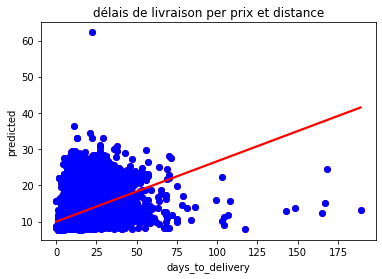

In [7]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color ='red');
plt.scatter(Y_test,Y_pred, color='blue')
plt.title('délais de livraison per prix et distance')
plt.xlabel('days_to_delivery');
plt.ylabel('predicted');

# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))


<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Regression Ridge</h3>
</div>

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# define model
model = Ridge(alpha=1.0)

Mean MAE: 5.502 (0.151)
[10.24570888 11.69090351 12.37357023 ... 19.69286666 11.62909103
 20.70380686]
Coefficient of determination: 0.16


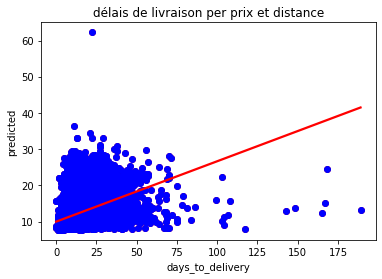

In [9]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# fit model
model.fit(X_train , Y_train)

# make a prediction
y_hat = model.predict(X_test)
# summarize prediction
print( y_hat)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_hat))

sns.regplot(x=Y_test,y=y_hat,ci=None,color ='red');
plt.scatter(Y_test,y_hat, color='blue')
plt.title('délais de livraison per prix et distance')
plt.xlabel('days_to_delivery');
plt.ylabel('predicted');

<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Regression Lasso</h3>
</div>

In [10]:
from sklearn.linear_model import Lasso , LassoCV
from sklearn.model_selection import GridSearchCV

# define model
lasso = Lasso(alpha= 0.01)
# fit model
lasso.fit(X_train, Y_train)

y_las = lasso.predict(X_test)

print(lasso.score(X_test,Y_test))
print(lasso.coef_)
print(lasso.intercept_)

0.16383919133156677
[0.04312101 0.00588848]
7.653434438350893


Coefficients: 
 [0.04316844 0.00588802]
Mean squared error: 70.20
Coefficient of determination: 0.16


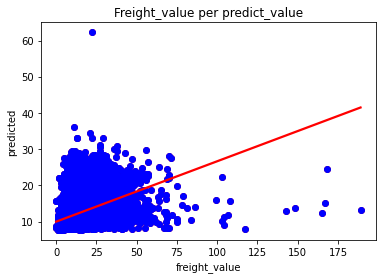

In [11]:
sns.regplot(x=Y_test,y=y_las,ci=None,color ='red');
plt.scatter(Y_test,y_las, color='blue')
plt.title('Freight_value per predict_value')
plt.xlabel('freight_value');
plt.ylabel('predicted');
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_las))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_las))


<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Regression ElasticNet</h3>
</div>

In [12]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.fit(X_train, Y_train)

print(regr.coef_)

print(regr.intercept_)

y_reg = regr.predict(X_test)

print(regr.score(X_test, Y_test))

[0.0406911  0.00591219]
7.687795191855582
0.16382570847164712


Coefficients: 
 [0.0406911  0.00591219]
Mean squared error: 70.20
Coefficient of determination: 0.16


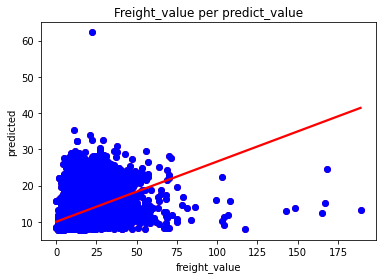

In [13]:
sns.regplot(x=Y_test,y=y_reg,ci=None,color ='red');
plt.scatter(Y_test,y_reg, color='blue')
plt.title('Freight_value per predict_value')
plt.xlabel('freight_value');
plt.ylabel('predicted');
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_reg))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_reg))


<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Dummy Regressor</h3>
</div>

In [16]:

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error



dummy_mean = DummyRegressor(strategy = 'mean')
dummy_mean.fit(X_train, Y_train)

dummy_median = DummyRegressor(strategy = 'median').fit(X_train, Y_train)
dummy_median.fit(X_train, Y_train)


y_predict_dummy_mean = dummy_mean.predict(X_test)
y_predict_dummy_median = dummy_median.predict(X_test)
y_predict_dummy_median

array([10., 10., 10., ..., 10., 10., 10.])

In [17]:
Y_test

73809      3.0
83295     46.0
12872     24.0
98317     10.0
109525    12.0
          ... 
87828     18.0
70008      4.0
27462     16.0
44087     15.0
53063     43.0
Name: days_to_delivery, Length: 21932, dtype: float64

In [18]:
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(Y_test, 
                                                                     y_predict_dummy_mean)))
  
print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(Y_test, 
                                                                    y_predict_dummy_median)))
  
print("r2_score (dummy mean): {:.2f}".format(r2_score(Y_test, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(r2_score(Y_test, y_predict_dummy_median)))


Mean squared error (dummy): 83.96
Median absolute error (dummy): 4.00
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.04
